In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('/content/Volodymyr_Zelensky.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
def kirsch_function(image, pixel_limit=127):
# Kirsch operators
  kernels = [
      np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]),
      np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),
      np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),
      np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]]),
      np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),
      np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),
      np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),
      np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])
  ]

  kirsch = np.max([cv2.filter2D(image, -1, kernel) for kernel in kernels], axis=0)
  m,n = image.shape
  for i in range(m):
    for j in range(n):
      kirsch[i,j]= 255 if kirsch[i,j] > pixel_limit else 0

  return kirsch

In [ ]:
h = 600
r = h / img.shape[1]
dim = (h, int(img.shape[0] * r))

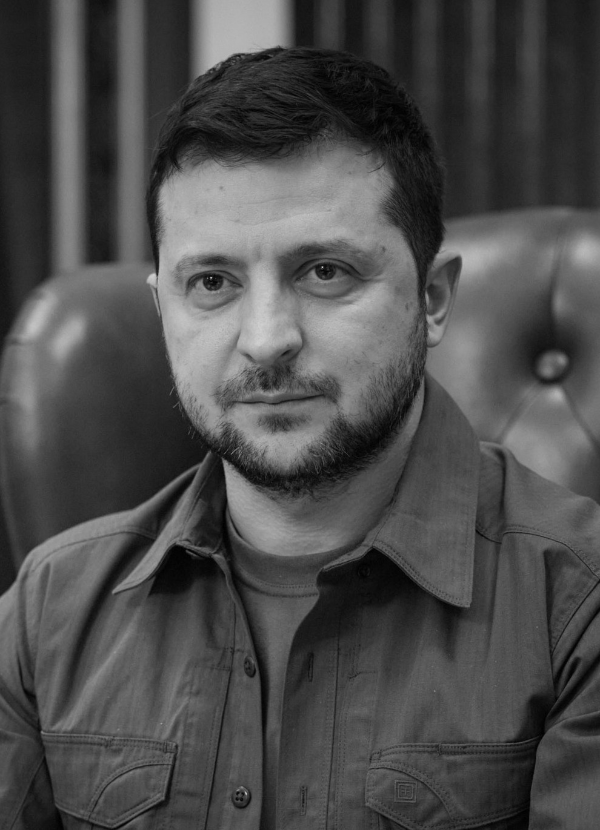

In [ ]:
cv2_imshow(cv2.resize(img, dim))

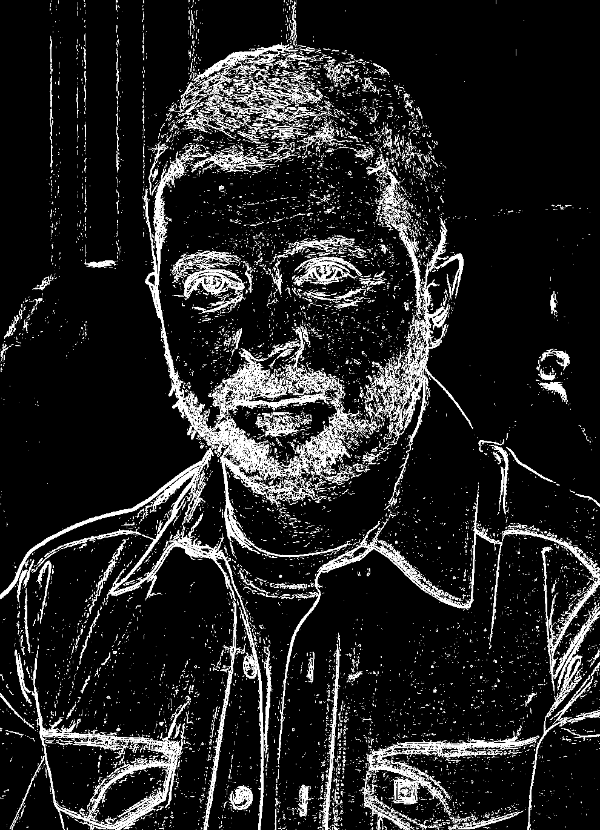

In [ ]:
kirsch = cv2.resize(kirsch_function(img), dim)
cv2_imshow(kirsch)

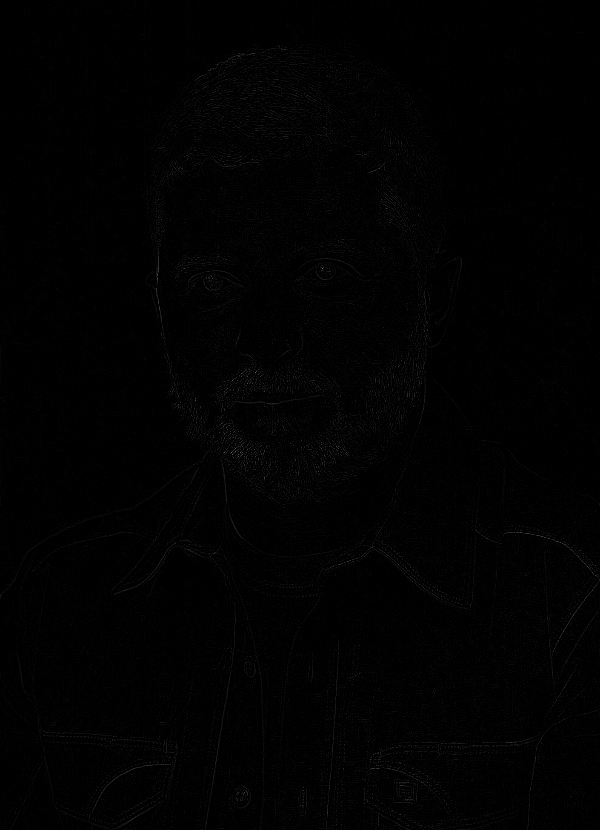

In [ ]:
laplacian = cv2.resize(cv2.Laplacian(img, cv2.CV_64F), dim)
cv2_imshow(laplacian)